Jonathon Nguyen

ID: 801093003

Homework 1

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from torchvision import datasets
from torchvision import transforms
import time

In [87]:
# Find the normalized of the input tensor.
def normalized_data(tensor):
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    new_tensor = (tensor - mean) / std
    
    return new_tensor

def training_loop(epochs, optimizer, model, loss_fn, training_vars, validation_vars, 
                  training_prices, validation_prices):
    training_losses = []
    val_losses = []
    for epoch in range(1, epochs + 1):
        # Validation model and loss
        with torch.no_grad():
            prices_p_val = torch.squeeze(model(validation_vars))
            loss_val = loss_fn(prices_p_val, validation_prices)
            val_losses.append(float(loss_val))
        
        # Training model and loss
        for i, input_var in enumerate(training_vars):
            prices_p_train = torch.squeeze(model(input_var))
            loss_train = loss_fn(prices_p_train, training_prices[i])
            training_losses.append(float(loss_train)) 

            # Set the new params.
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            
        
        # Print out the losses every 10 epoch
        if epoch % 10 == 0 or epoch == 1:
            print(f'Epoch {epoch}: Training Loss: {float(loss_train)}, Validation Loss: {float(loss_val)}')
    
    return training_losses, val_losses

In [97]:
NUM_EPOCHS = 200

# Read the data from the provided CSV files
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# Split the data into the input vars and the prices.
names_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
prices = housing['price']

# Find the length of the column.
num_samples = len(prices)
num_val = int(0.2 * num_samples)

# Generate the random indices with 80% training and 20% Validation
random_indices = torch.randperm(num_samples)
training_indices = random_indices[:-num_val]
validation_indices = random_indices[-num_val:]

input_vars = torch.tensor(housing[names_vars].values).float()
training_tensor = normalized_data(input_vars[training_indices])
validation_tensor = normalized_data(input_vars[validation_indices])

# Convert the prices to a tensor.
prices = torch.tensor(prices.values).float()
price_training = normalized_data(prices[training_indices])
price_validation = normalized_data(prices[validation_indices])
prices = normalized_data(prices)

In [98]:
# Model with one hidden layer of 8
model = nn.Sequential(
        nn.Linear(5, 8),
        nn.Tanh(),
        nn.Linear(8, 1))

optimizer = optim.SGD(model.parameters(), lr=.0001)
loss_function = nn.MSELoss()

In [99]:
train_loss, val_loss = training_loop(NUM_EPOCHS, optimizer, model, loss_function, training_tensor, 
                                     validation_tensor, price_training, price_validation)

Epoch 1: Training Loss: 0.0028561907820403576, Validation Loss: 1.0501784086227417
Epoch 10: Training Loss: 0.006565732415765524, Validation Loss: 0.8974369168281555
Epoch 20: Training Loss: 0.0016593653708696365, Validation Loss: 0.8259453177452087
Epoch 30: Training Loss: 2.715105983952526e-05, Validation Loss: 0.7707829475402832
Epoch 40: Training Loss: 0.0021822263952344656, Validation Loss: 0.7323186993598938
Epoch 50: Training Loss: 0.006566234398633242, Validation Loss: 0.7081403136253357
Epoch 60: Training Loss: 0.01151558943092823, Validation Loss: 0.6941960453987122
Epoch 70: Training Loss: 0.01590805873274803, Validation Loss: 0.6864868402481079
Epoch 80: Training Loss: 0.01928093284368515, Validation Loss: 0.6821249723434448
Epoch 90: Training Loss: 0.02162322774529457, Validation Loss: 0.6794195771217346
Epoch 100: Training Loss: 0.023124342784285545, Validation Loss: 0.6775123476982117
Epoch 110: Training Loss: 0.024012895300984383, Validation Loss: 0.6760079860687256
Epo

Text(0.5, 1.0, 'Prices')

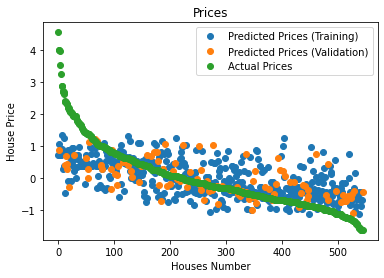

In [100]:
# Find the predicted prices
prices_p_train = model(training_tensor)
prices_p_val = model(validation_tensor)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Houses Number")
plt.ylabel("House Price")
           
# Plot the model and the actual values.\n",
plt.plot(training_indices, prices_p_train.detach().numpy(), 'o', label='Predicted Prices (Training)')
plt.plot(validation_indices, prices_p_val.detach().numpy(), 'o', label='Predicted Prices (Validation)')
plt.plot(prices.numpy(), 'o', label='Actual Prices')
plt.legend()
plt.title("Prices")

Text(0.5, 1.0, 'Losses')

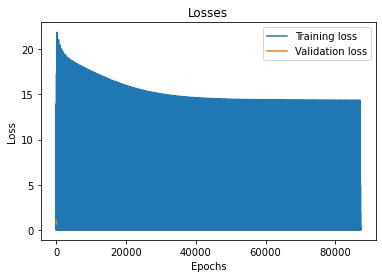

In [101]:
# Plotting the Losses

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot the model and the actual values.
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title("Losses")

In [47]:
# Model with three hidden layer of 8, 32, 10
model_new = nn.Sequential(
        nn.Linear(5, 8),
        nn.Tanh(),
        nn.Linear(8, 32),
        nn.Tanh(),
        nn.Linear(32, 10),
        nn.Tanh(),
        nn.Linear(10, 1))

optimizer = optim.SGD(model_new.parameters(), lr=.001)

train_loss, val_loss = training_loop(NUM_EPOCHS, optimizer, model_new, nn.MSELoss(), training_tensor, 
                                     validation_tensor, price_training, price_validation)

Epoch 1: Training Loss: 26553468.0, Validation Loss: 24858680.0
Epoch 10: Training Loss: 20800218.0, Validation Loss: 19306326.0
Epoch 20: Training Loss: 14598884.0, Validation Loss: 13364110.0
Epoch 30: Training Loss: 10624562.0, Validation Loss: 9597236.0
Epoch 40: Training Loss: 8077502.0, Validation Loss: 7216243.5
Epoch 50: Training Loss: 6445137.0, Validation Loss: 5716824.5
Epoch 60: Training Loss: 5398989.5, Validation Loss: 4777106.0
Epoch 70: Training Loss: 4728533.0, Validation Loss: 4191851.75
Epoch 80: Training Loss: 4298849.0, Validation Loss: 3830376.75
Epoch 90: Training Loss: 4023474.5, Validation Loss: 3609607.75
Epoch 100: Training Loss: 3846992.25, Validation Loss: 3476838.25
Epoch 110: Training Loss: 3733886.5, Validation Loss: 3398727.75
Epoch 120: Training Loss: 3661399.75, Validation Loss: 3354256.5
Epoch 130: Training Loss: 3614945.5, Validation Loss: 3330229.75
Epoch 140: Training Loss: 3585172.75, Validation Loss: 3318411.5
Epoch 150: Training Loss: 3566093.0

Text(0.5, 1.0, 'Prices')

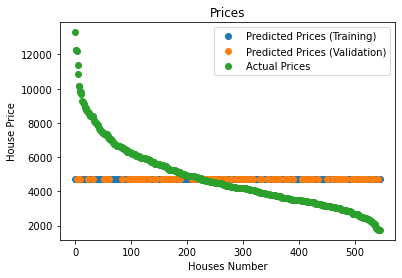

In [48]:
# Find the predicted prices
prices_p_train = model_new(training_tensor)
prices_p_val = model_new(validation_tensor)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Houses Number")
plt.ylabel("House Price")

# Plot the model and the actual values.
plt.plot(training_indices, prices_p_train.detach().numpy(), 'o', label='Predicted Prices (Training)')
plt.plot(validation_indices, prices_p_val.detach().numpy(), 'o', label='Predicted Prices (Validation)')
plt.plot(prices.numpy(), 'o', label='Actual Prices')
plt.legend()
plt.title("Prices")

Text(0.5, 1.0, 'Losses')

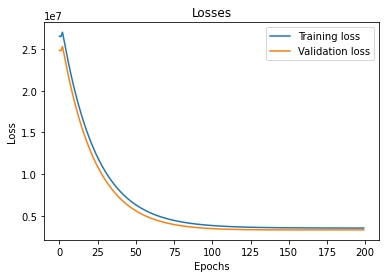

In [49]:
# Plotting the Losses

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot the model and the actual values.
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title("Losses")

Problem 2

In [ ]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
])

def training_loop(epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, epochs + 1):
        for imgs, labels in train_loader:
            output = model(imgs.view(imgs.shape[0], -1))
            loss = loss_fn(output, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print(f"Epoch: {epoch}, Loss: {float(loss)}")
        
    return float(loss)
        
def model_accuracy(model, val_loader):
    correct_labels = 0
    count = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            output = model(imgs.view(imgs.shape[0], -1))
            _, predicted = torch.max(output, dim=1)
            count += labels.shape[0]
            correct_labels += int((predicted == labels).sum())
            
    return (correct_labels/count)

In [ ]:
data = '.\cifar10'
cirfar10_train = datasets.CIFAR10(data, train=True, download=True, transform=transforms)
cirfar10_val = datasets.CIFAR10(data, train=False, download=True, transform=transforms)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
NUM_EPOCHS = 200
LEARNING_RATE = 1e-2
BATCH_SIZE = 64


model = nn.Sequential(
        nn.Linear(3072, 512),
        nn.Tanh(),
        nn.Linear(512, 10),
        nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
train_loader = torch.utils.data.DataLoader(cirfar10_train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(cirfar10_val, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
start_time = time.time()
model_loss = training_loop(NUM_EPOCHS, optimizer, model, loss, train_loader)
end_time = time.time()

accuracy = model_accuracy(model, val_loader)
print(f"Final Loss: {model_loss}, Accuracy: {accuracy}, Training Time: {end_time - start_time}")

In [ ]:
model_new = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.Tanh(),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1))

start_time = time.time()
model_loss = training_loop(NUM_EPOCHS, optimizer, model_new, loss, train_loader)
end_time = time.time()

accuracy = model_accuracy(model, val_loader)
print(f"Final Loss: {model_loss}, Accuracy: {accuracy}, Training Time: {end_time - start_time}")